# Первое задание. Построение кубического сплайна.
## Пацакула Никита. Группа 16132.

## Шаг 1.
### 1.1) Импортируем математические библиотеки:      
 - Модуль [**math**](https://docs.python.org/2/library/math.html) ответственен за математические функции.  
 - Модуль [**numpy**](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html) ответственен за типи данных(матрицы), которые мы дальше будем использовать.  
 - Модуль [**matplotlib.pyplot**](https://matplotlib.org/api/pyplot_api) ответственен за графический вывод.
 
### 1.2) Включаем вывод matplotlib командой:
```python
%matplotlib inline
```

In [1]:
import math
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

## Шаг 2.  
### 2.1) Реализуем функцию [метода прогонки](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm).
 - *A = np.array(init_A)* - инициализирует массив A, идентичный поступившему на вход функции(init_A).
 - *n = A.shape[0]* - инициализируем переменную n, равный размерности A, т.е. находим размерность A.
 - *return_val* = np.zeros(shape=(n), dtype=float) - инициализируем массив решения заполненный нулями, размерностью равный входному A.
 - *for **i** in range(1,n)* - цикл, итератор которого будет целочисленно изменяться от 1 до n.
 - *for **i** in reversed(range(0, n - 1))* - цикл, итератор которого будет целочисленно изменяться от n-1 до 1.

In [2]:
def tridiagonal_matrix_algorythm(init_A, init_b):
    h_diag = numpy.zeros(shape=(init_A.shape[0] - 1), dtype=numpy.float64(0.))
    m_diag = numpy.zeros(shape=(init_A.shape[0]), dtype=numpy.float64(0.))
    l_diag = numpy.zeros(shape=(init_A.shape[0] - 1), dtype=numpy.float64(0.))
    n = init_A.shape[0]

    for i in range(0, n - 1):
        h_diag[i], m_diag[i], l_diag[i] = init_A[i][i + 1], init_A[i][i], init_A[i + 1][i]
    m_diag[n - 1] = init_A[n - 1][n - 1]
    
    if n == 0:
        return 1
    if n > 1:
        h_diag[0] /= m_diag[0]
    init_b[0] /= m_diag[0]
    for i in range(1, n - 1):
        h_diag[i] /= m_diag[i] - h_diag[i - 1] * l_diag[i - 1]
    for i in range(1, n):
        init_b[i] = (init_b[i] - l_diag[i - 1] * init_b[i - 1]) / (m_diag[i] - h_diag[i - 1] * l_diag[i - 1])
    result = numpy.zeros(shape=(n), dtype=float)
    result[n - 1] = init_b[n - 1]
    # method reversal
    for i in reversed(range(0, n - 1)):
        result[i] = init_b[i] - h_diag[i] * result[i + 1]
    return result

### 2.3) Реализуем тестовую функцию.
Данная функция получает в качестве входного значения $x$, возвращая значение $x^\frac{\cos{\frac{x}{2}}}{3} + \frac{x}{8}$ со смещением на 500.0 для наглядности.

In [3]:
def real_function(x):
    if x > 140. :
        return 1000. + (1.0/3.0)*math.cos(x / 15.0)
    else :
        return 1000.

## Шаг 3.
### 3.1) Реализуем определение значений $x_i$ , $y_i$.
 - Зададим краевые значения ($x \in [100 , 110]$ == $x \in [A,B]$):
```python
boundary_condition_A = 100.
boundary_condition_B = 110.
```
 - Задаем количество узлов:
```python
N = 2
```
 - Находим $x_i$ по формуле $x_i = A + \frac{B - A}{(N - 1)}(i + \cos(5i))$ и $y_i$ по формуле $y_i$ = real_function($x_i$) для $x \in (A,B)$:
 ```python
# len(x) equal dim(x) equal N
n = len(x)
for i in range(1, n - 1):
    x[i] = AA + (BB - AA) / (N - 1) * (i + 0. * math.cos(5. * i))
    y[i] = real_fun(x[i])
```
 - Определяем $x_0, x_n$ и $y_0, y_n$ для краевых значений A и B:
 ```python
x[0] = boundary_condition_A
x[N - 1] = boundary_condition_B
y[0] = real_fun(x[0])
y[N - 1] = real_fun(x[N - 1])
 ```

In [4]:
boundary_condition_A = 100.
boundary_condition_B = 200.
N = 5
x = numpy.zeros(shape=(N), dtype=numpy.float64(0.))
y = numpy.zeros(shape=(x.shape[0]), dtype=numpy.float64(0.))
# Achtung!
Left = 5.
Right = 15.
n = len(x)
for i in range(1, n - 1):
    x[i] = boundary_condition_A + (boundary_condition_B - boundary_condition_A) / (N - 1) * (i + 0. * math.cos(5. * i))
    y[i] = real_function(x[i])
x[0] = boundary_condition_A
x[N - 1] = boundary_condition_B
y[0] = real_function(x[0])
y[N - 1] = real_function(x[N - 1])
print(x)
print(y)

[ 100.  125.  150.  175.  200.]
[ 1000.          1000.           999.72030949  1000.20728062  1000.24000724]


## Шаг 4.
### 4.1) Определим трехдиагональную матрицу, требуемую для метода прогонки.
 - Определим матрицы A, b, h, gamma типа [float64](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html).
 - Определим значения $h_1$ и $h_{n-1}$:
 ```python
h[1] = x[1] - x[0]
h[n - 1] = x[n - 1] - x[n - 2]
```
 - Определим $h_{i + 1}$ как $h_{i + 1} = x_{i+1} - x_i$.
 - Определим $b_i$ как $6 * (\frac{y_{i + 1} - y_i}{h_{i + 1}} - \frac{y_i - y_{i-1}}{h_i})$
 - Определим элементы матрицы А:
 ```python
    A[i - 1][i - 1] = 2 * (h[i + 1] + h[i])
    A[i][i - 1] = h[i + 1]
    A[i - 1][i] = A[i][i - 1]
 ```
 - В случае, когда количество узлов более трех, добавляем элементы матрицы:
 ```python
    A[n - 3][n - 3] = 2 * (h[n - 1] + h[n - 2])
    b[n - 3] = 6 * ((y[n - 1] - y[n - 2]) / h[n - 1] - (y[n - 2] - y[n - 3]) / h[n - 2])
 ```

In [5]:
# define 'A' matrix (n-2)x(n-2) with float64-type coefficient 
A = numpy.zeros(shape=(n - 2, n - 2), dtype=numpy.float64(0.))
# define 'b' array (n-2) with float64-type coefficient 
b = numpy.zeros(shape=(n - 2), dtype=numpy.float64(0.))
# define 'h' array (n) with float64-type coefficient 
h = numpy.zeros(shape=(n), dtype=numpy.float64(0.))
# define 'gamma' array (n) with float64-type coefficient 
gamma = numpy.zeros(shape=(n), dtype=numpy.float64(0.))
h[1] = x[1] - x[0]
h[n - 1] = x[n - 1] - x[n - 2]
for i in range(1, n - 2):
    h[i + 1] = x[i + 1] - x[i]
    b[i - 1] = 6 * ((y[i + 1] - y[i]) / h[i + 1] - (y[i] - y[i - 1]) / h[i])
    A[i - 1][i - 1] = 2 * (h[i + 1] + h[i])
    A[i][i - 1] = h[i + 1]
    A[i - 1][i] = A[i][i - 1]
if n >= 3:
    A[n - 3][n - 3] = 2 * (h[n - 1] + h[n - 2])
    b[n - 3] = 6 * ((y[n - 1] - y[n - 2]) / h[n - 1] - (y[n - 2] - y[n - 3]) / h[n - 2])

### 4.2) Найдем значения $\gamma$.

In [6]:
gamma[0] = Left
gamma[n - 1] = Right
if b.shape[0] != 0:
    b[0] = b[0] - h[1] * Left
    b[n - 3] = b[n - 3] - h[n - 1]  * Right
tmp = tridiagonal_matrix_algorythm(A, b)
for i in range(1, n - 1):
    gamma[i] = tmp[i - 1]

## Шаг 5.
### 5.1) Определим значения функции.

In [7]:
def fun(inputed_x):
    if inputed_x <= x[0]:
        i = 0
        return y[i] * (x[i + 1] - inputed_x) / h[i + 1] + y[i + 1] * (inputed_x - x[i]) / h[i+1] + gamma[i] * ((x[i + 1] - inputed_x) ** 3 - (h[i + 1] ** 2) * (x[i + 1] - inputed_x)) / (6 * h[i + 1]) + gamma[i + 1] * ((inputed_x - x[i]) ** 3 - (h[i + 1] ** 2) * (inputed_x - x[i])) / (6 * h[i + 1])
    for i in range(0, n - 1):
        if (inputed_x <= x[i + 1] and inputed_x >= x[i]):
            return y[i] * (x[i + 1] - inputed_x) / h[i + 1] + y[i + 1] * (inputed_x - x[i]) / h[i+1] + gamma[i] * ((x[i + 1] - inputed_x) ** 3 - (h[i + 1] ** 2) * (x[i + 1] - inputed_x)) / (6 * h[i + 1]) + gamma[i + 1] * ((inputed_x - x[i]) ** 3 - (h[i + 1] ** 2) * (inputed_x - x[i])) / (6 * h[i + 1])

### 5.2) Определим функцию графического вывода.

In [8]:
def get_graph(inputed_x, inline_function):
    drawner = numpy.array(inputed_x)
    for i in range(0, drawner.shape[0]):
        drawner[i] = inline_function(drawx[i])
    return drawner

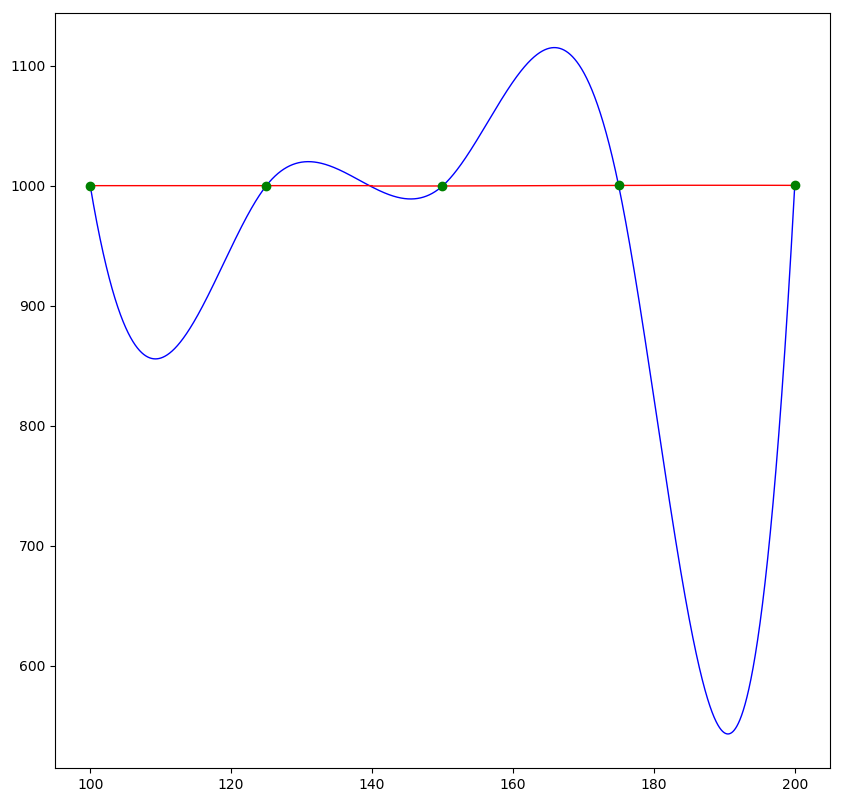

In [9]:
drawx = numpy.arange(x[0], x[n - 1], 0.001)
drawner = get_graph(drawx, fun)
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
curve1, = plt.plot(drawx, drawner, 'b-', linewidth=1.)
drawner = get_graph(drawx, real_function)
curve2, = plt.plot(drawx, drawner, 'r-', linewidth=1.)
curve3, = plt.plot(x, y, 'go')
plt.show()

In [16]:
eps = 1.0
print("Current epsilon: ", eps)

XS = x[N - 1]
print("Task: f'(a)=5, f''(b)=15.")

print("The result of the SECOND-order numerical differentiation formula:")
ddf = (fun(x[0]) - 2 * fun(x[0] + eps) + fun(x[0] + 2 * eps)) / (eps ** 2)
print("f'(a) = ",ddf)
ddf2 = (fun(XS) - 2 * fun(XS - eps) + fun(XS - 2 * eps)) / (eps ** 2)
print("f''(b) = ",ddf2)

print("The result of the THIRD-order numerical differentiation formula:")
ddff = (2 * fun(x[0]) - 5 * fun(x[0] + eps) + 4 * fun(x[0] + 2 * eps) - fun(x[0] + 3 * eps)) / (eps ** 2) 
print("f'(a) = ",ddff) 
ddff2 = (-1.0 * fun(XS - 3.0 * eps) + 4.0 * fun(XS - 2.0 * eps) - 5.0 * fun(XS - eps) + 2.0 * fun(XS)) / eps ** 2.0
print("f''(b) =", ddff2)

Current epsilon:  1.0
Task: f'(a)=5, f''(b)=15.
The result of the SECOND-order numerical differentiation formula:
f'(a) =  4.73566137429
f''(b) =  14.2356446171
The result of the THIRD-order numerical differentiation formula:
f'(a) =  5.0
f''(b) = 15.0
